In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

# Importing
from google.colab import files
import io
import os

#Linear regression/multiple linear regression
from sklearn.linear_model import LinearRegression
#Support vector regression
from sklearn.svm import SVR
#Decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
#Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Analysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#Analytics
import matplotlib.pyplot as plt

In [ ]:
# Create dataframe from an uploaded file. Colab will save the file once 
# uploaded, so to avoid uploading again we check if the file is there
# and use that.
if not os.path.isfile("./CO2 Emissions_Canada.csv"):
  uploaded = files.upload() # Upload file to read into a dataframe.
# Create dataframe from uploaded or path.
data = pd.read_csv("./CO2 Emissions_Canada.csv" 
                 if os.path.isfile("./CO2 Emissions_Canada.csv") 
                 else io.BytesIO(uploaded["CO2 Emissions_Canada.csv"]))
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


### NaN Detection
We will check to see if any of our values are NaN in case we need to fill those in. Luckily none of them are NaN so we can move on without any issues.

In [ ]:
nan_cols = data.isna().any()
print(nan_cols) # Print here to see which ones are NaN
nan_cols = nan_cols.to_dict()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool


In [ ]:
# Doing another check.
print(data.isnull().values.any())
data.dtypes

False


Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [ ]:
data["Make"].value_counts() # Went through this manually to check each.

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: Make, dtype: int64

### Encoding
We will want to encode each string data type. We can do this automatically and get to see which ones are going to be encoded.

In [ ]:
print(data.dtypes)
features = []
for feature, dtype in zip(data.columns.values, data.dtypes):
  if pd.api.types.is_string_dtype(dtype):
    print(feature, dtype)
    features.append(feature)

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object
Make object
Model object
Vehicle Class object
Transmission object
Fuel Type object


In [ ]:
# Data Encoding
# Some of the features we will want to use in our model are non-numeric.
# To solve this we use LabelEncoder to turn categorical data numeric.
encoded_data = data.copy() # We make a deep copy in case we need to reference to the original data set.

label_encoder = preprocessing.LabelEncoder()
# Each feature has to be specified, so we can loop through them for each.
# Loan_Status should be correctly labelled as Y = 1 and N = 0
for feature in features:
  encoded_data[feature] = label_encoder.fit_transform(encoded_data[feature]) # Loop through and impute each.
encoded_data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


In [ ]:
# Data Seperation and Splitting
# Seperating the data into our X and y data which we use as our tuples and classes.
X_data = encoded_data.drop(["CO2 Emissions(g/km)"], axis=1) # We remove the data that will be irrelevant.
y_data = encoded_data["CO2 Emissions(g/km)"] # Only the class data.

In [ ]:
#Split the data into a testing and training set (80% training 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

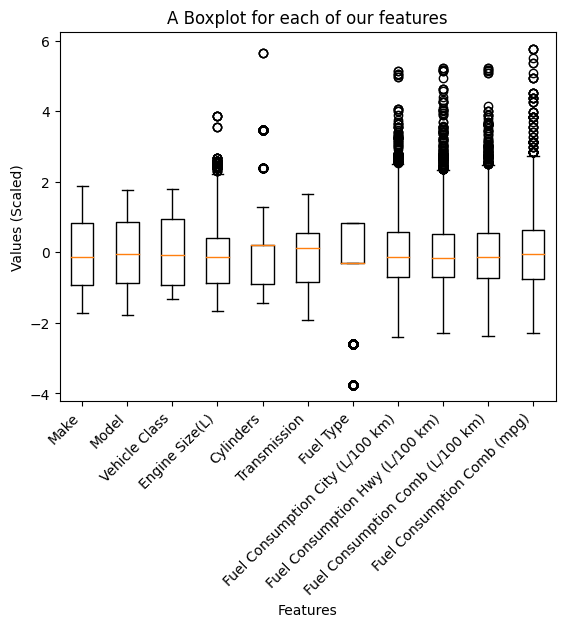

In [ ]:
#Boxplot for our scaled data to look for outliers
fig, ax = plt.subplots()
bp = ax.boxplot(pd.DataFrame(X_train_scaled, columns=X_data.columns).values, positions=range(len(pd.DataFrame(X_train_scaled, columns=X_data.columns).columns)))

# Add a title and axis labels
plt.title('A Boxplot for each of our features')
plt.xlabel('Features')
plt.ylabel('Values (Scaled)')

# Set x-axis tick labels
ax.set_xticklabels(pd.DataFrame(X_train_scaled, columns=X_data.columns).columns, rotation=45, ha='right')

plt.show()

<ipython-input-19-366f8f84dcc8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  scaled_corr_matrix = pd.DataFrame(data, columns=data.columns).corr()


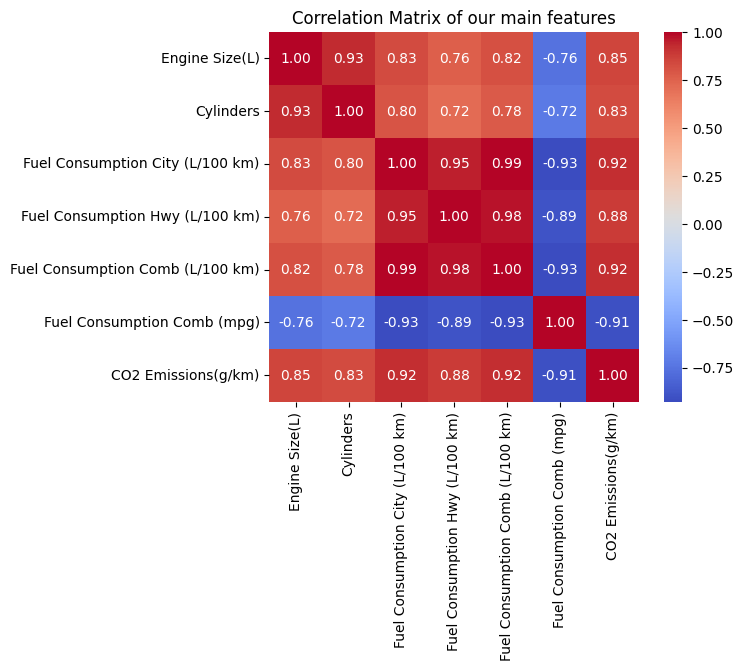

In [ ]:
#Get a correlation matrix
scaled_corr_matrix = pd.DataFrame(data, columns=data.columns).corr()

sb.heatmap(scaled_corr_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')

plt.title("Correlation Matrix of our main features")

plt.show()

In [ ]:
def regression_report(test, pred):
  r2 = r2_score(test, pred)
  mse = mean_squared_error(test, pred)
  rmse = mean_squared_error(test, pred, squared=False)
  return "{:<24}{:<24}{:<24}\n{:<24}{:<24}{:<24}".format("R2 Score", "Mean Square Error", "Root Mean Square Error", r2, mse, rmse)

R2 Score                Mean Square Error       Root Mean Square Error  
0.9141463205390631      295.30466951241624      17.18443102091007       


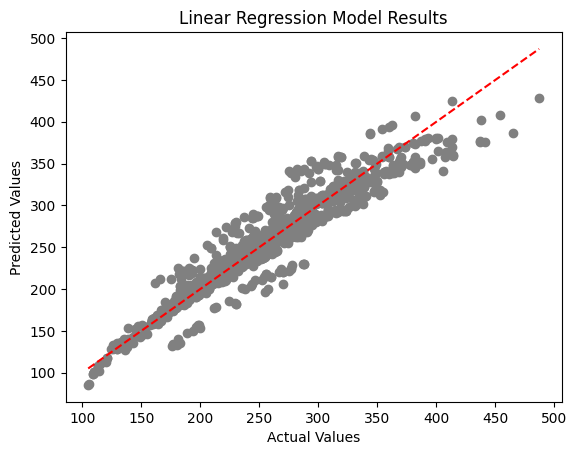

In [ ]:
# Linear Regression
fprs = [] # We'll use this in the AUC-ROC graph.
tprs = []

# We generate an instance of the model here which we then fit to our training data.
model = LinearRegression()
model.fit(X_train_scaled, y_train.ravel()) # Fit data.
y_pred = model.predict(X_test_scaled) # Creating predictions to generate a report with.
print(regression_report(y_test, y_pred)) # Generates a report for precision, recall, and f1-scores.

plt.scatter(y_test, y_pred, c='grey')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model Results')
plt.show()

In [ ]:
scores = cross_val_score(model, X_data, y_data, cv=5)
scores

array([0.88934802, 0.90708268, 0.92813299, 0.9017922 , 0.937838  ])

R2 Score                Mean Square Error       Root Mean Square Error  
0.8076589755830248      661.5814605240981       25.72122587522022       


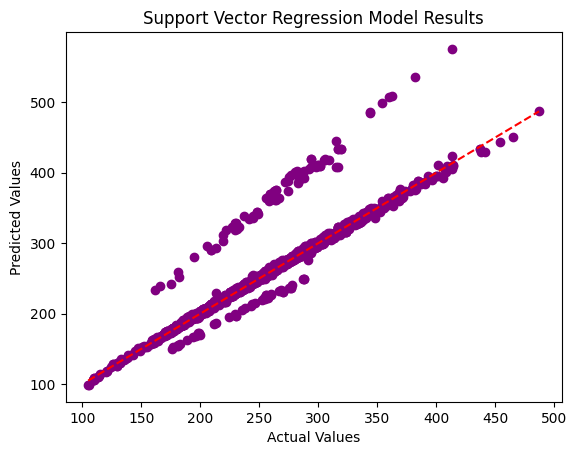

In [ ]:
#Support Vector Regression
model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train.ravel())
y_pred = model.predict(X_test_scaled)
print(regression_report(y_test, y_pred))

plt.scatter(y_test, y_pred, c='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression Model Results')
plt.show()

In [ ]:
#scores = cross_val_score(model, X_test, y_test, cv=5, verbose=1)
#scores

R2 Score                Mean Square Error       Root Mean Square Error  
0.9971749570216091      9.71709527570902        3.1172255734401095      


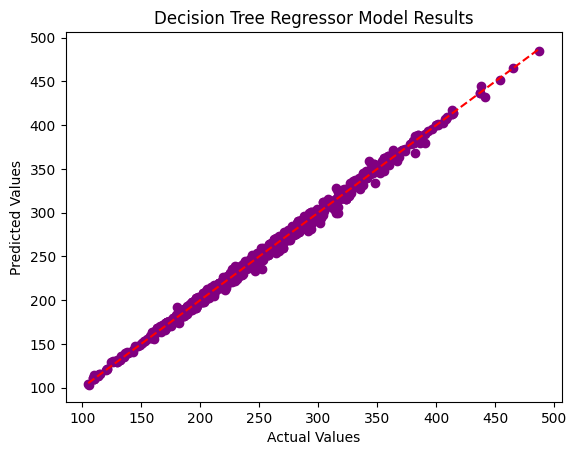

In [ ]:
#Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train.ravel())
y_pred = model.predict(X_test_scaled)
print(regression_report(y_test, y_pred))

plt.scatter(y_test, y_pred, c='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor Model Results')
plt.show()

In [ ]:
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([0.97542797, 0.97149946, 0.99219753, 0.99498468, 0.98396703])

R2 Score                Mean Square Error       Root Mean Square Error  
0.9977486062595504      7.743955630559676       2.782796368863463       


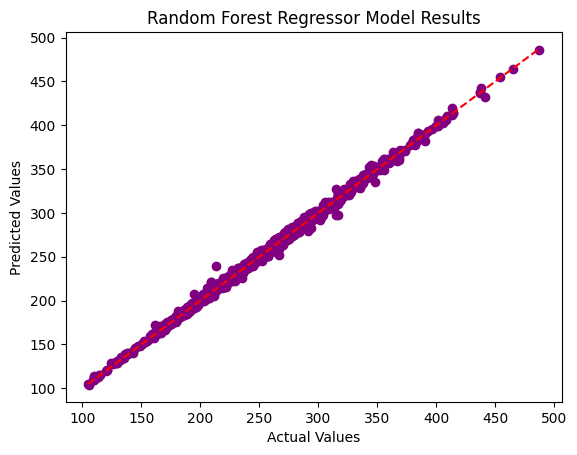

In [ ]:
#Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train.ravel())
y_pred = model.predict(X_test_scaled)
print(regression_report(y_test, y_pred))

plt.scatter(y_test, y_pred, c='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor Model Results')
plt.show()

In [ ]:
scores = cross_val_score(model, X_data, y_data, cv=5)
scores

array([0.9937686 , 0.99588836, 0.99336667, 0.99863612, 0.99857929])

R2 Score                Mean Square Error       Root Mean Square Error  
0.9250693519805713      257.7335111163926       16.054080824400774      


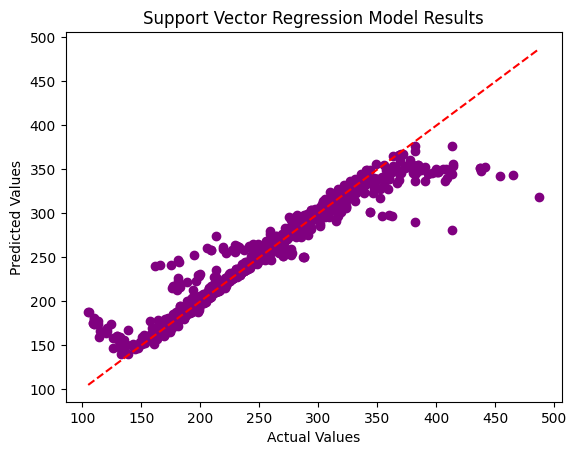

In [ ]:
#Support Vector Regression
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train.ravel())
y_pred = model.predict(X_test_scaled)
print(regression_report(y_test, y_pred))

plt.scatter(y_test, y_pred, c='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression Model Results')
plt.show()

In [ ]:
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([ 0.03595881,  0.00657714,  0.02099653, -0.00588089, -0.02908928])